In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
# inline 在行内显示
# plt.show() 在行内显示
%matplotlib inline 

# tk 在图形化界面显示，但是有可能会出现闪退的问题
# 解决方法 plt.ion() plt.pause(10) plt.close()
%matplotlib tk

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

使用梯度下降法，求 y=f(x)= x2 的最小值

In [3]:
## 原函数
def f(x):
    return 4*x ** 2+6+x+7

## 首先要对f(x)进行求导 y'=2x
def h(x):
    return 8 * x+6

X=[]
Y=[]

x=0 #初始值
step = 0.05 #步长

f_change = f(x)
f_current = f(x)
X.append(x)
Y.append(f_current)
while f_change>1e-10:
    x = x-step * h(x)
    tmp = f(x)
    f_change = np.abs(f_current - tmp)
    f_current = tmp
    X.append(x)
    Y.append(f_current)
    print(u'x=',x)
    print(u'f_change:',f_change,'f_current=',f_current)
print(u'最终结果为',(x,f_current))

x= -0.30000000000000004
f_change: 0.0600000000000005 f_current= 13.06
x= -0.48000000000000004
f_change: 0.38159999999999883 f_current= 13.4416
x= -0.5880000000000001
f_change: 0.3533760000000008 f_current= 13.794976
x= -0.6528
f_change: 0.25681535999999916 f_current= 14.05179136
x= -0.6916800000000001
f_change: 0.17021352960000158 f_current= 14.2220048896
x= -0.7150080000000001
f_change: 0.10793287065600055 f_current= 14.329937760256001
x= -0.7290048
f_change: 0.06684943343615934 f_current= 14.39678719369216
x= -0.73740288
f_change: 0.04086195603701448 f_current= 14.437649149729175
x= -0.742441728
f_change: 0.024788000173327163 f_current= 14.462437149902502
x= -0.7454650368
f_change: 0.014970297662397769 f_current= 14.4774074475649
x= -0.74727902208
f_change: 0.00901727771846339 f_current= 14.486424725283364
x= -0.7483674132479999
f_change: 0.005423002314646652 f_current= 14.49184772759801
x= -0.7490204479488
f_change: 0.0032583502348746407 f_current= 14.495106077832885
x= -0.749412268

X= [2, 1.68, 1.4112, 1.185408, 0.99574272, 0.8364238848, 0.702596063232, 0.59018069311488, 0.4957517822164992, 0.41643149706185933, 0.3498024575319618, 0.29383406432684794, 0.24682061403455227, 0.20732931578902392, 0.17415662526278008, 0.14629156522073528, 0.12288491478541763, 0.1032233284197508, 0.08670759587259068, 0.07283438053297617, 0.061180879647699984, 0.051391938904067985, 0.04316922867941711, 0.036262152090710376, 0.030460207756196716, 0.02558657451520524, 0.021492722592772403, 0.01805388697792882, 0.01516526506146021, 0.012738822651626576, 0.010700611027366323, 0.008988513262987712, 0.0075503511409096774, 0.006342294958364129, 0.0053275277650258685, 0.00447512332262173, 0.003759103591002253, 0.0031576470164418925, 0.00265242349381119, 0.0022280357348013996, 0.0018715500172331756, 0.0015721020144758675, 0.0013205656921597287, 0.0011092751814141722, 0.0009317911523879046, 0.0007827045680058398, 0.0006574718371249054, 0.0005522763431849206, 0.0004639121282753333, 0.0003896861877

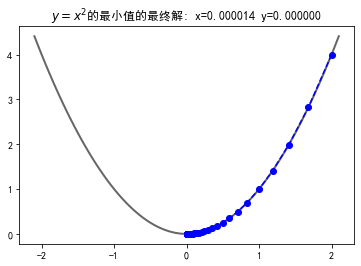

In [19]:
fig = plt.figure()
X2 = np.arange(-2.1,2.15,0.05)
Y2 = X2 ** 2
print('X=',X)
print('Y=',Y)
plt.plot(X2,Y2,'-',color = '#666666',linewidth = 2)
plt.plot(X,Y,'bo--')
plt.title('$y=x^2$的最小值的最终解: x=%f y=%f'%(x,f_current))
plt.show()

In [ ]:
使用梯度下降法，求 z=f(x,y)= x2+y2 的最小值

In [20]:
## 原函数
def f(x,y):
    return x ** 2 + 2*y ** 2
## 偏函数
def hx(t):
    return 2 * t

def hy(t):
    return 4 * t

X=[]
Y=[]
Z=[]

x=2
y=2

f_change = f(x,y)
f_current = f(x,y)
step = 0.1

X.append(x)
Y.append(y)
Z.append(f_current)

while f_change > 1e-10:
    x = x - step * hx(x)
    y = y - step * hy(y)
    f_change = f_current - f(x,y)
    f_current = f(x,y)
    X.append(x)
    Y.append(y)
    Z.append(f_current)
    print(u'x,y:',(x,y))
    print(u'f_change:',f_change,'f_current=',f_current)
    
print(u'最终结果为：',(x,y))

x,y: (1.6, 1.2)
f_change: 6.56 f_current= 5.44
x,y: (1.28, 0.72)
f_change: 2.7648 f_current= 2.6752000000000002
x,y: (1.024, 0.432)
f_change: 1.2533760000000003 f_current= 1.421824
x,y: (0.8192, 0.2592)
f_change: 0.6163660799999999 f_current= 0.80545792
x,y: (0.65536, 0.15552)
f_change: 0.3275882496 f_current= 0.47786967040000006
x,y: (0.5242880000000001, 0.09331199999999999)
f_change: 0.18557750476799995 f_current= 0.2922921656320001
x,y: (0.4194304000000001, 0.055987199999999994)
f_change: 0.11010117206016004 f_current= 0.18219099357184007
x,y: (0.33554432000000006, 0.033592319999999995)
f_change: 0.06734411496161283 f_current= 0.11484687861022724
x,y: (0.26843545600000007, 0.020155391999999994)
f_change: 0.04197680491895195 f_current= 0.0728700736912753
x,y: (0.21474836480000006, 0.012093235199999997)
f_change: 0.026460720831796354 f_current= 0.04640935285947894
x,y: (0.17179869184000005, 0.007255941119999998)
f_change: 0.016789264978469828 f_current= 0.029620087881009113
x,y: (0.13

In [21]:
from mpl_toolkits.mplot3d import Axes3D
# tk 在图形化界面显示，但是有可能会出现闪退的问题
# 解决方法 plt.ion() plt.pause(10) plt.close()
%matplotlib tk

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
X2 = np.arange(-2,2,0.2)
Y2 = np.arange(-2,2,0.2)
X2,Y2=np.meshgrid(X2,Y2)
Z2 = X2**2 +2*Y2**2
ax.plot_surface(X2,Y2,Z2,rstride=1,cstride=1,cmap='rainbow')
ax.plot(X,Y,Z,'ro--')
plt.show()
print('X=',X)
print('Y=',Y)
print('Z=',Z)

X= [2, 1.6, 1.28, 1.024, 0.8192, 0.65536, 0.5242880000000001, 0.4194304000000001, 0.33554432000000006, 0.26843545600000007, 0.21474836480000006, 0.17179869184000005, 0.13743895347200002, 0.10995116277760002, 0.08796093022208001, 0.070368744177664, 0.056294995342131206, 0.04503599627370496, 0.03602879701896397, 0.028823037615171177, 0.02305843009213694, 0.018446744073709553, 0.014757395258967642, 0.011805916207174114, 0.009444732965739291, 0.0075557863725914335, 0.006044629098073147, 0.004835703278458518, 0.003868562622766814, 0.0030948500982134514, 0.002475880078570761, 0.001980704062856609, 0.0015845632502852873, 0.00126765060022823, 0.0010141204801825839, 0.0008112963841460671, 0.0006490371073168537, 0.000519229685853483, 0.0004153837486827864, 0.0003323069989462291, 0.00026584559915698326, 0.00021267647932558662, 0.0001701411834604693, 0.00013611294676837542, 0.00010889035741470034, 8.711228593176027e-05, 6.968982874540821e-05, 5.575186299632657e-05, 4.460149039706126e-05, 3.5681192